0.7906891495601172


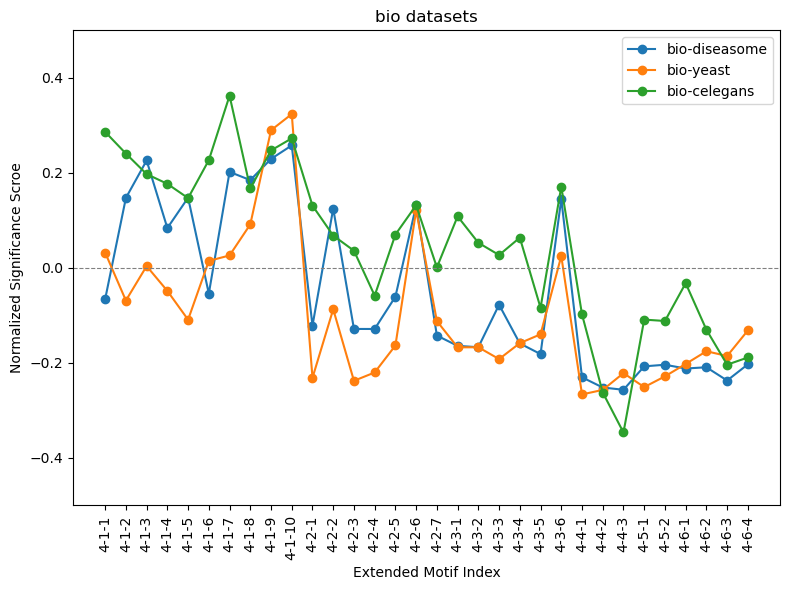

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the JSON file
with open('./extend_output/output.json') as f:
    real = json.load(f)

with open('./extend_output/random_output.json') as f:
    random = json.load(f)

# Extract the domain name
domain = 'bio'
sorted_keys = ['4-1-1', '4-1-2', '4-1-3', '4-1-4', '4-1-5', '4-1-6', '4-1-7', '4-1-8', '4-1-9', '4-1-10', 
               '4-2-1', '4-2-2', '4-2-3', '4-2-4', '4-2-5', '4-2-6', '4-2-7', 
               '4-3-1', '4-3-2', '4-3-3', '4-3-4', '4-3-5', '4-3-6', 
               '4-4-1', '4-4-2', '4-4-3', 
               '4-5-1', '4-5-2', 
               '4-6-1', '4-6-2', '4-6-3', '4-6-4']
srp_data = []

# Prepare for plotting
plt.figure(figsize=(8, 6))

for i in range(3):
    real_data = real[i]
    random_data = random[i]
    
    dataset = real_data["dataset"]
    
    # Remove the dataset name from the data
    del real_data["dataset"]
    del random_data["dataset"]
    
    # Compute Delta_i for each subgraph
    epsilon = 1
    delta_i = {}
    for key in real_data.keys():
        N_real_i = real_data[key]
        N_rand_i = random_data[key]
        delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)
    
    # Normalize Delta_i to get SRP_i
    sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
    srp_i = {key: delta / np.sqrt(sum_delta_squared) for key, delta in delta_i.items()}
    
    # Sort SRP_i by subgraph keys
    sorted_srp_i = [srp_i[key] for key in sorted_keys]
    srp_data.append(sorted_srp_i)
    
    # Plot the Subgraph Ratio Profile
    plt.plot(sorted_keys, sorted_srp_i, marker='o', label=f'{dataset}')

correlation_coefficient, _ = spearmanr(srp_data[1], srp_data[2])
print(correlation_coefficient)
                                      
# Plot settings
plt.xlabel('Extended Motif Index')
plt.ylabel('Normalized Significance Scroe')
plt.title(f'{domain} datasets')
plt.ylim(-0.5, 0.5)
plt.xticks(rotation=90)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()

# Save the plot
filename = f'{domain}_extend.png'
plt.savefig(f'./figure/{filename}')

# Display the plot
plt.show()


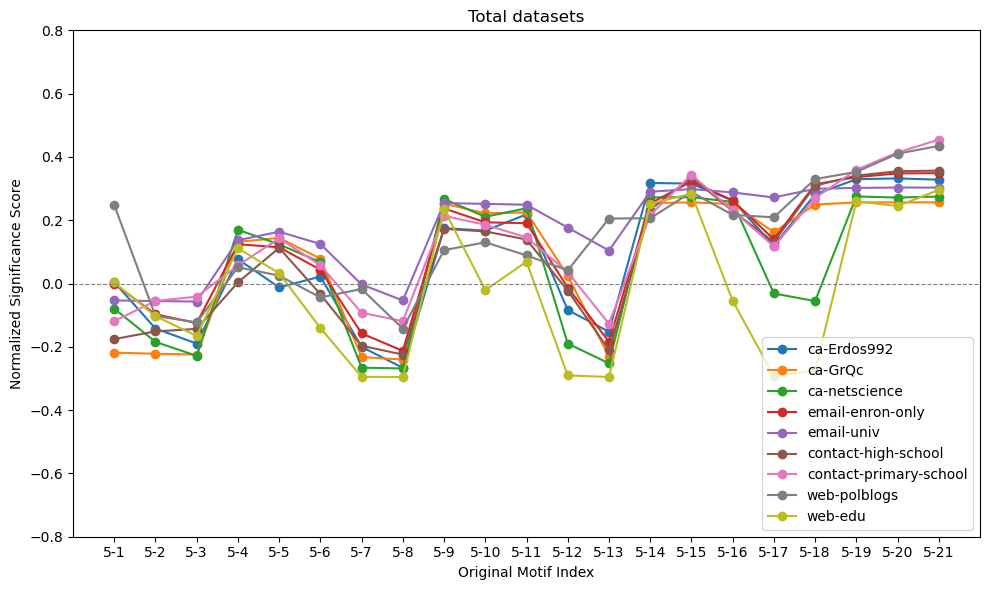

,0,1,2,3,4,5,6,7,8
0,1.000000,0.917543,0.889271,0.980555,0.899616,0.950601,0.917198,0.812873,0.726575
1,0.917543,1.000000,0.894616,0.947448,0.950074,0.940432,0.899678,0.618913,0.630341
2,0.889271,0.894616,1.000000,0.895942,0.794659,0.844538,0.837380,0.576835,0.862950
3,0.980555,0.947448,0.895942,1.000000,0.901052,0.977129,0.951762,0.771293,0.729897
4,0.899616,0.950074,0.794659,0.901052,1.000000,0.927201,0.882993,0.733599,0.522538
5,0.950601,0.940432,0.844538,0.977129,0.927201,1.000000,0.982140,0.759426,0.675145
6,0.917198,0.899678,0.837380,0.951762,0.882993,0.982140,1.000000,0.748308,0.717210
7,0.812873,0.618913,0.576835,0.771293,0.733599,0.759426,0.748308,1.000000,0.519832
8,0.726575,0.630341,0.862950,0.729897,0.522538,0.675145,0.717210,0.519832,1.000000


In [57]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# Load the JSON file
with open('./original_output/output.json') as f:
    real = json.load(f)

with open('./original_output/random_output.json') as f:
    random = json.load(f)

# Extract the domain name
domain = 'Total'
sorted_keys4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']

sorted_keys5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
sorted_keys = sorted_keys4 + sorted_keys5
srp_data = []

# Define domain groups
domains = {
    'collaboration': [3, 4, 5],
    'email': [6, 7],
    'contact': [9, 10],
    'web' : [11, 12]
}
dataset_order= {}
for keys in domains:
    dataset_order[keys] = []
    

# Prepare for plotting
plt.figure(figsize=(10, 6))

index = 0
for group_name, indices in domains.items():
    for i in indices:
        real_data = real[i]
        random_data = random[i]

        dataset = real_data["dataset"]
        dataset_order[group_name].append(index)
        index += 1

        # Remove the dataset name from the data
        del real_data["dataset"]
        del random_data["dataset"]

        # Compute Delta_i for each subgraph
        epsilon = 4
        delta_i = {}
        for key in list(real_data.keys())[6:]:
            N_real_i = real_data[key]
            N_rand_i = random_data[key]
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = {key: delta / np.sqrt(sum_delta_squared) for key, delta in delta_i.items()}

        # Sort SRP_i by subgraph keys
        sorted_srp_i = [srp_i[key] for key in sorted_keys5]
        srp_data.append(sorted_srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(sorted_keys5, sorted_srp_i, marker='o', label=f'{dataset}')

df = pd.DataFrame(srp_data).T
correlation_matrix = df.corr(method='pearson')

# Plot settings
plt.xlabel('Original Motif Index')
plt.ylabel('Normalized Significance Score')
plt.title(f'{domain} datasets')
plt.ylim(-0.8, 0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()

# Save the plot
filename = f'{domain}_original.png'
plt.savefig(f'./figure/{filename}')

# Display the plot
plt.show()
correlation_matrix


In [54]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    intra_domain_corr = []
    inter_domain_corr = []
    
    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            if domain1 == domain2:
                domain_corr = correlation_matrix.loc[indices1, indices1].values
                if len(indices1) > 1:  # Avoid single-element arrays
                    intra_domain_corr.append(np.mean(domain_corr[np.triu_indices_from(domain_corr, k=1)]))
            else:
                domain_corr = correlation_matrix.loc[indices1, indices2].values
                inter_domain_corr.append(np.mean(domain_corr))
    
    average_intra_domain_corr = np.mean(intra_domain_corr) if intra_domain_corr else np.nan
    average_inter_domain_corr = np.mean(inter_domain_corr) if inter_domain_corr else np.nan
    
    return average_intra_domain_corr, average_inter_domain_corr

average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(correlation_matrix, dataset_order)

print(f'Average correlation within the same domain: {average_intra_domain_corr:.4f}')
print(f'Average correlation between different domains: {average_inter_domain_corr:.4f}')

Average correlation within the same domain: 0.8206
Average correlation between different domains: 0.8065
